<>:91: SyntaxWarning: invalid escape sequence '\M'
<>:91: SyntaxWarning: invalid escape sequence '\M'
C:\Users\dell\AppData\Local\Temp\ipykernel_7716\1999157686.py:91: SyntaxWarning: invalid escape sequence '\M'
  audio_path = "D:\MTech-BigDataSets\songs2Analuze\wave"
C:\Users\dell\AppData\Local\Temp\ipykernel_7716\1999157686.py:11: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, audio_data = wavfile.read(file_path)


Loading audio file: D:\MTech-BigDataSets\songs2Analuze\wave\Folk_Song_From_Uttarakhand_Nupur_Pant.wav
Audio loaded with sample rate: 48000 Hz


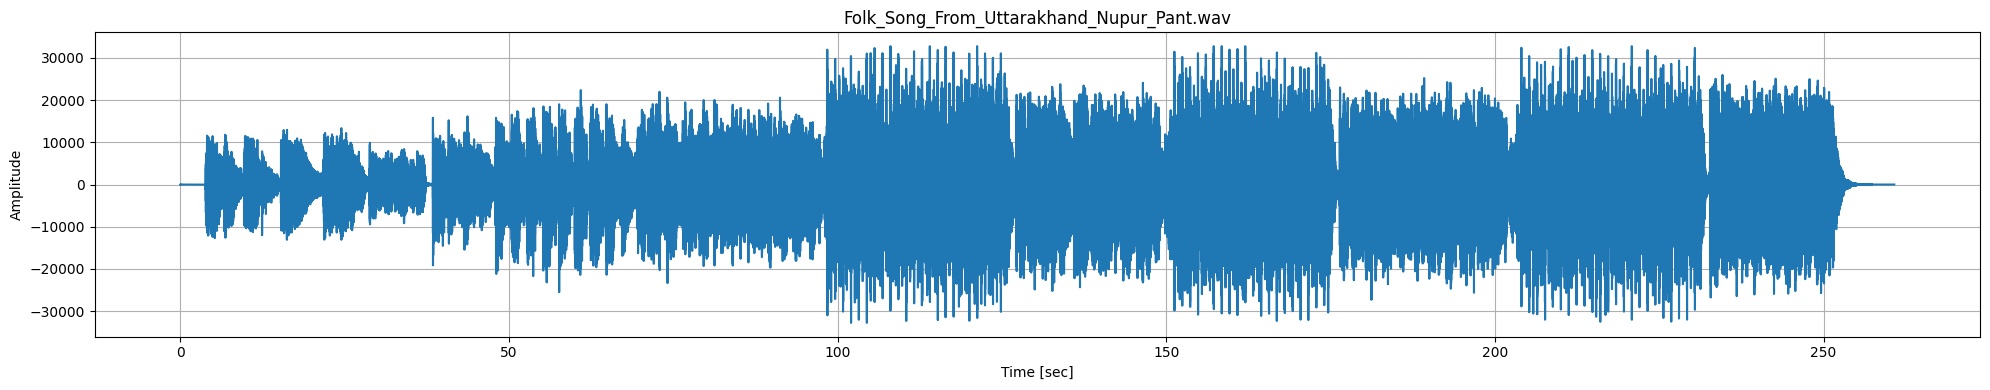

Applying Hann window...
Generating spectrogram with hann window...


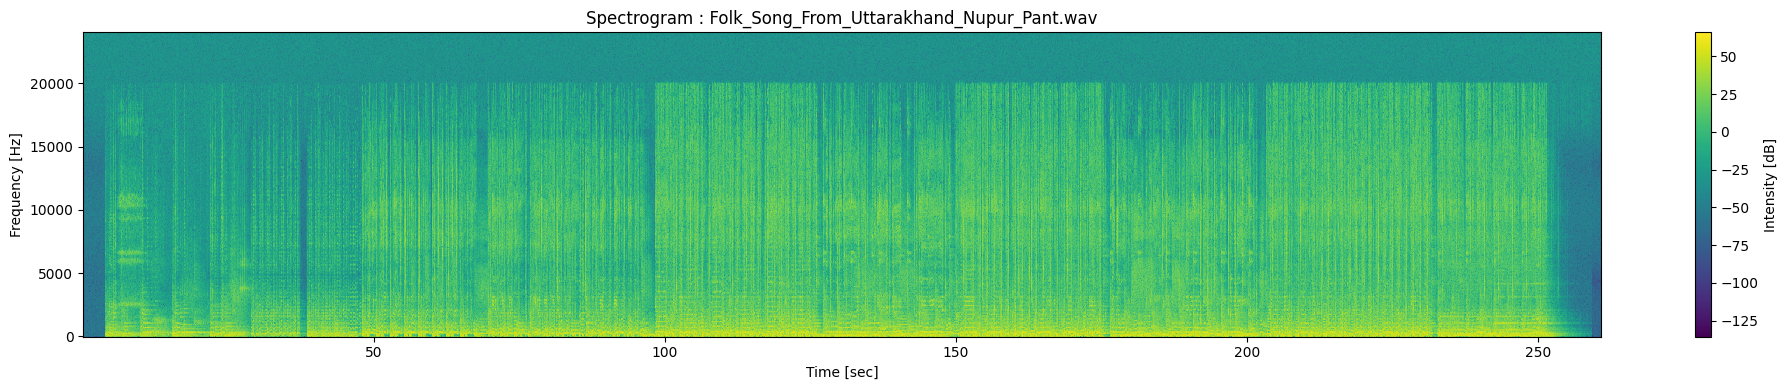

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
import os


def load_audio(file_path):
    """Load audio file and return sample rate and data"""
    print(f"Loading audio file: {file_path}")
    sample_rate, audio_data = wavfile.read(file_path)
    # Convert to mono if stereo
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]
    return sample_rate, audio_data


def apply_hann_window(audio_data, window_size=1024):
    """Apply Hann window to audio data"""
    print("Applying Hann window...")
    window = np.hanning(window_size)
    return window * audio_data[:window_size]


def apply_hamming_window(audio_data, window_size=1024):
    """Apply Hamming window to audio data"""
    print("Applying Hamming window...")
    window = np.hamming(window_size)
    return window * audio_data[:window_size]


def apply_rectangular_window(audio_data, window_size=1024):
    """Apply Rectangular window to audio data"""
    print("Applying Rectangular window...")
    window = np.ones(window_size)
    return window * audio_data[:window_size]


def generate_spectrogram(audio_data, sample_rate, window_type='hann'):
    """Generate spectrogram using STFT"""
    print(f"Generating spectrogram with {window_type} window...")
    if window_type == 'hann':
        window = np.hanning(1024)
    elif window_type == 'hamming':
        window = np.hamming(1024)
    else:  # rectangular
        window = np.ones(1024)

    frequencies, times, spectrogram = signal.spectrogram(audio_data,
                                                         fs=sample_rate,
                                                         window=window,
                                                         nperseg=1024,
                                                         noverlap=512)
    return frequencies, times, spectrogram


def plot_windowed_signal(signal_data, title):
    """Plot a windowed signal"""
    plt.figure(figsize=(20, 4))
    plt.plot(signal_data)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.show()


def plot_spectrogram(frequencies, times, spectrogram, title):
    """Plot a spectrogram"""
    plt.figure(figsize=(20, 4))
    plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.colorbar(label='Intensity [dB]')
    plt.tight_layout()
    plt.show()

def plot_waveform(audio_data, sample_rate, title):
    """Plot the waveform of the audio data."""
    time = np.linspace(0, len(audio_data) / sample_rate, len(audio_data))  # Time axis
    plt.figure(figsize=(20, 4))
    plt.plot(time, audio_data)
    plt.title(title)
    plt.xlabel('Time [sec]')
    plt.ylabel('Amplitude')
    plt.grid(True)  # Add a grid for better readability
    plt.tight_layout()
    plt.show()

def main():
    audio_path = "D:\MTech-BigDataSets\songs2Analuze\wave"
    song_file = 'Folk_Song_From_Uttarakhand_Nupur_Pant.wav'
    full_path = os.path.join(audio_path, song_file)
    sample_rate, audio_data = load_audio(full_path)
    print(f"Audio loaded with sample rate: {sample_rate} Hz")

    plot_waveform(audio_data, sample_rate, song_file)

    hann_signal = apply_hann_window(audio_data)
    #plot_windowed_signal(hann_signal, 'Hann Windowed Signal')
    frequencies, times, spectrogram = generate_spectrogram(audio_data, sample_rate, 'hann')
    plot_spectrogram(frequencies, times, spectrogram, 'Spectrogram : '+song_file)

if __name__ == "__main__":
    main()
